**Glass Data**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [ ]:
glass=pd.read_csv('glass.csv')

In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.duplicated().sum()

1

In [ ]:
glass.drop_duplicates(inplace=True)

In [ ]:
glass.shape

(213, 10)

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


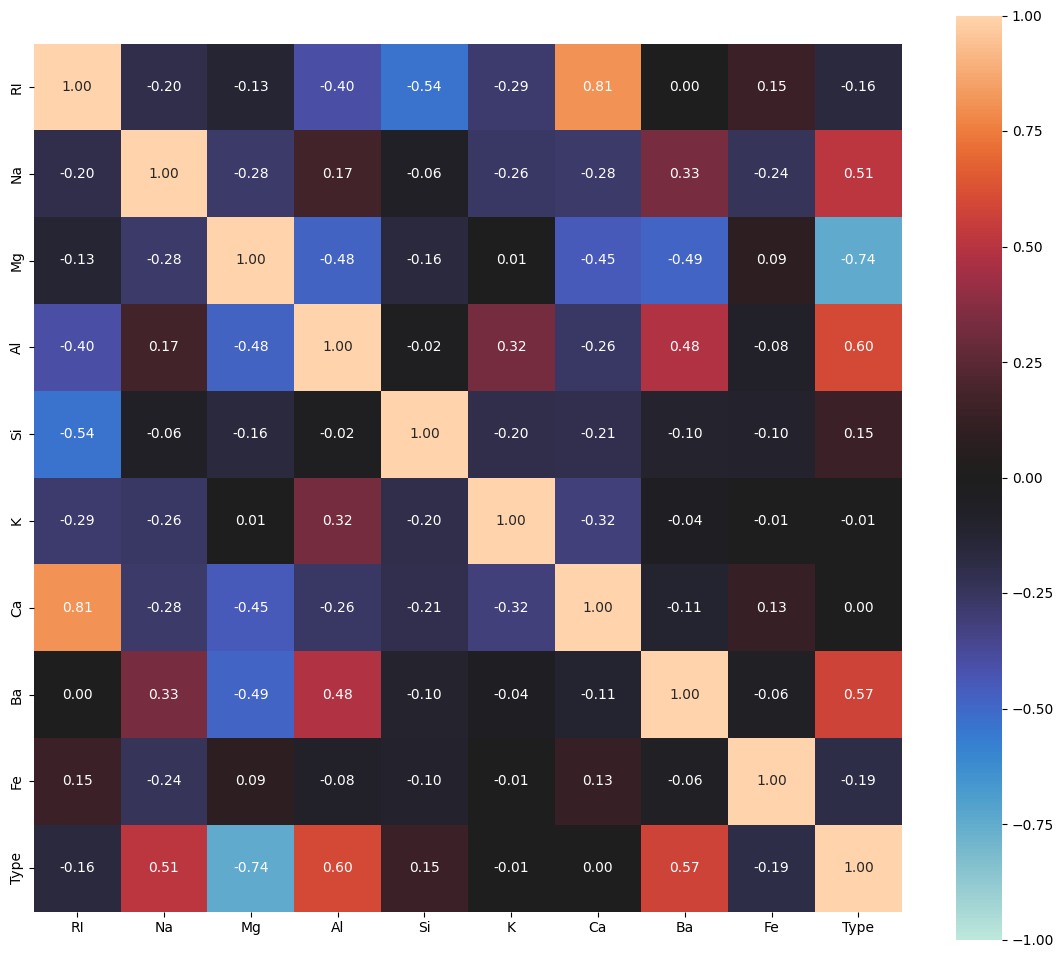

{'corr':             RI        Na        Mg        Al        Si         K        Ca  \
 RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
 Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
 Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
 Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
 Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
 K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
 Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
 Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
 Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
 Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   
 
             Ba        Fe      Type  
 RI    0.001679  0.147083 -0.160140  
 Na    0.329080 -0.239374  0.508837  
 Mg   -

In [ ]:
from dython.nominal import associations
associations(glass,figsize=(14,12))

<Axes: xlabel='Fe', ylabel='Count'>

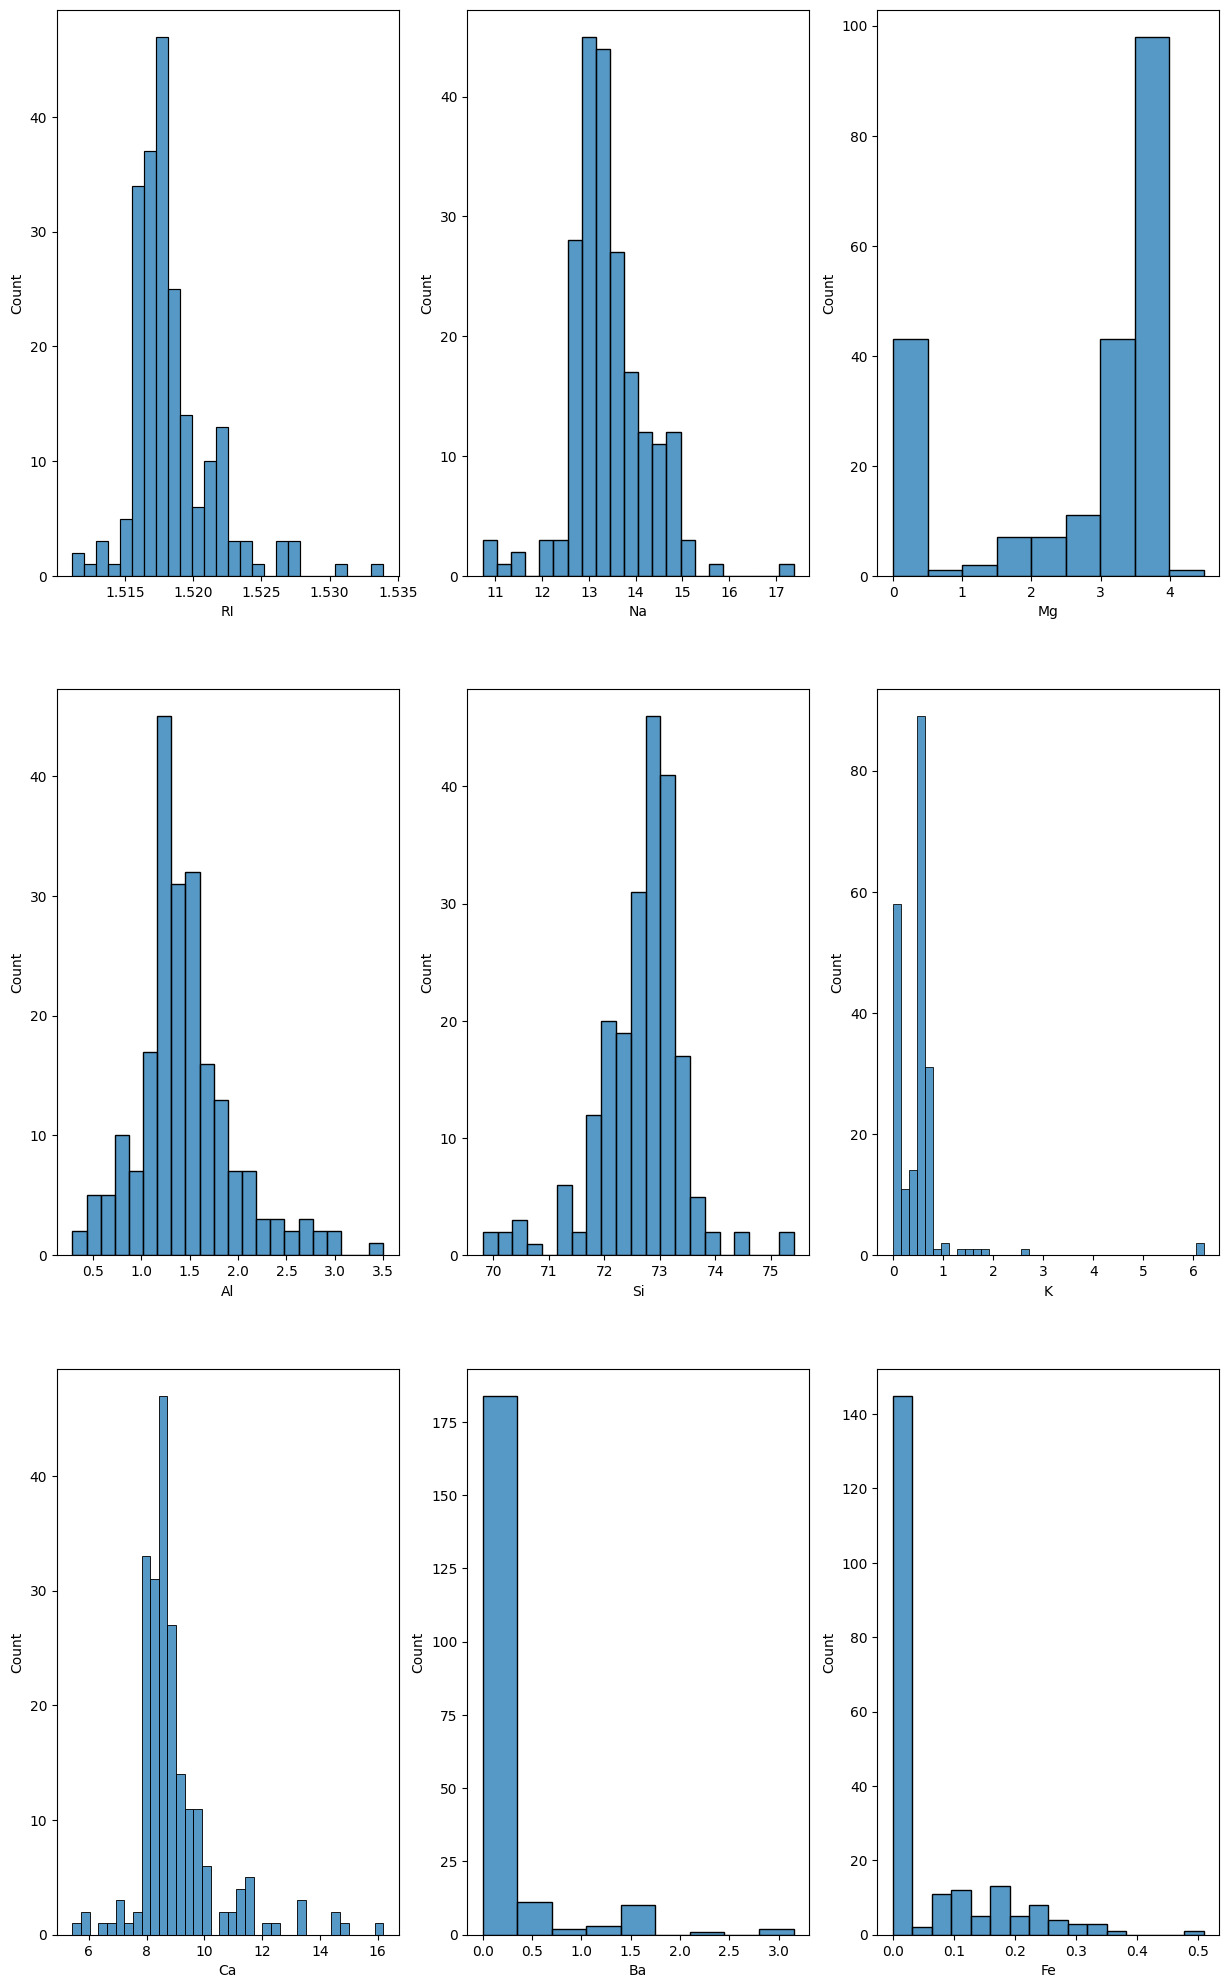

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,25))
sns.histplot(glass['RI'],palette='deep',ax=ax[0,0])
sns.histplot(glass['Na'],palette='deep',ax=ax[0,1])
sns.histplot(glass['Mg'],palette='deep',ax=ax[0,2])

sns.histplot(glass['Al'],palette='deep',ax=ax[1,0])
sns.histplot(glass['Si'],palette='deep',ax=ax[1,1])
sns.histplot(glass['K'],palette='deep',ax=ax[1,2])

sns.histplot(glass['Ca'],palette='deep',ax=ax[2,0])
sns.histplot(glass['Ba'],palette='deep',ax=ax[2,1])
sns.histplot(glass['Fe'],palette='deep',ax=ax[2,2])

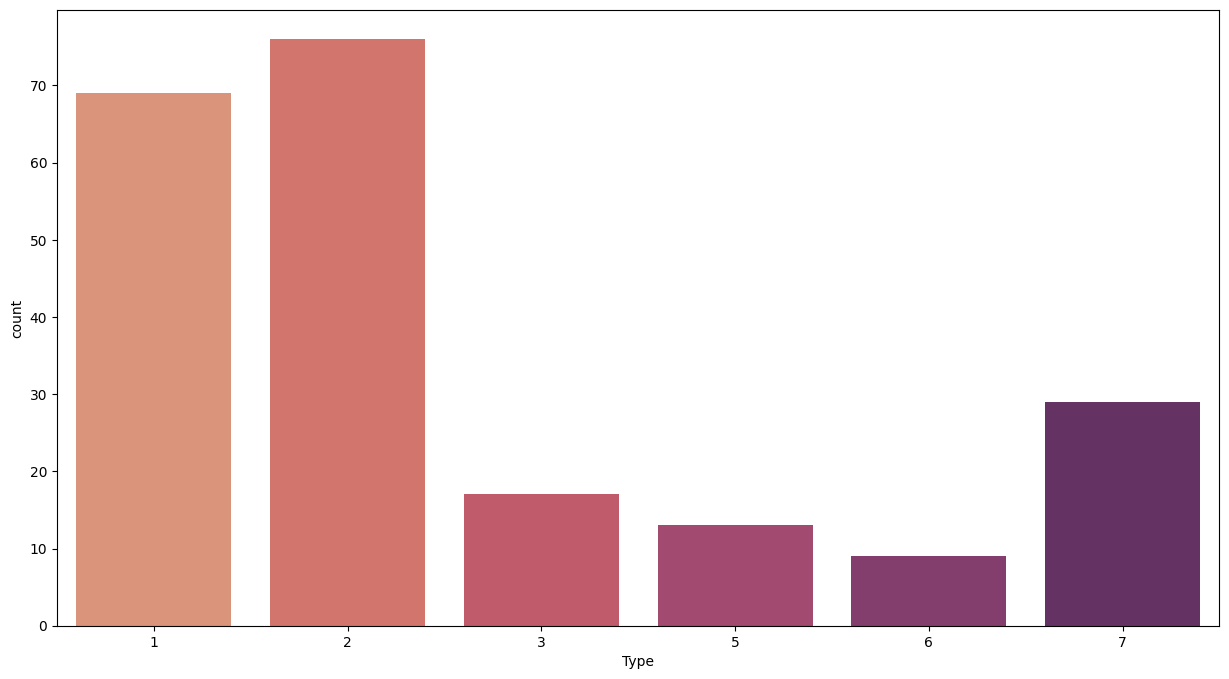

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Type',data=glass,palette='flare');

**Data Preprocessing**

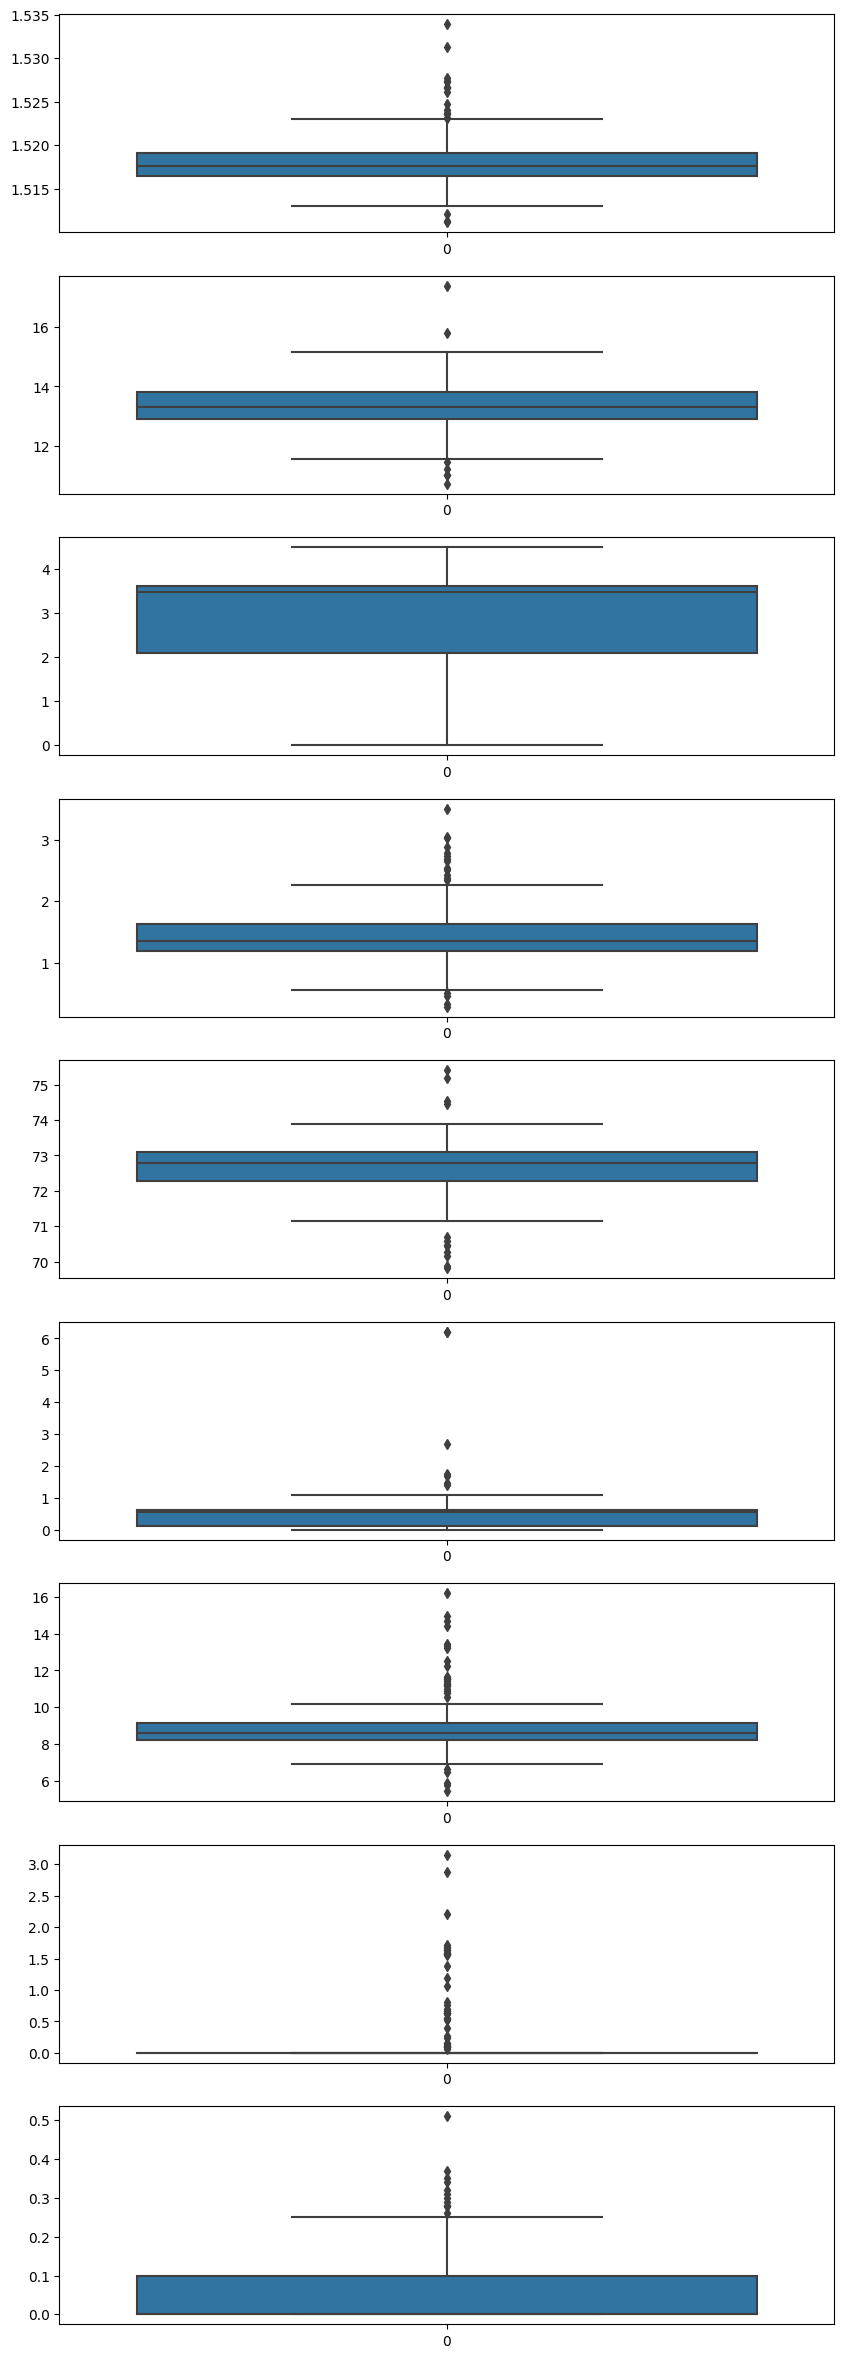

In [ ]:
fig,ax=plt.subplots(9,1,figsize=(10,30))

sns.boxplot(glass['RI'],ax=ax[0])
sns.boxplot(glass['Na'],ax=ax[1])
sns.boxplot(glass['Mg'],ax=ax[2])

sns.boxplot(glass['Al'],ax=ax[3])
sns.boxplot(glass['Si'],ax=ax[4])
sns.boxplot(glass['K'],ax=ax[5])

sns.boxplot(glass['Ca'],ax=ax[6])
sns.boxplot(glass['Ba'],ax=ax[7])
sns.boxplot(glass['Fe'],ax=ax[8])
plt.show()

In [ ]:
glass1=glass.drop(['Type'],axis=1)

In [ ]:
outliers=[]
for feature in glass1.columns:
  Q1,Q3=np.percentile(glass1[feature],[25,75])
  IQR=Q3-Q1
  ul=Q3+1.5*IQR
  ll=Q1-1.5*IQR
  outlier=glass1[feature][(glass1[feature]<ll)|(glass1[feature]>ul)]
  outliers.append(outlier)

In [ ]:
outliers

[47     1.52667
 50     1.52320
 56     1.51215
 103    1.52725
 104    1.52410
 105    1.52475
 106    1.53125
 107    1.53393
 110    1.52664
 111    1.52739
 112    1.52777
 131    1.52614
 170    1.52369
 184    1.51115
 185    1.51131
 187    1.52315
 189    1.52365
 Name: RI, dtype: float64,
 105    11.45
 106    10.73
 110    11.23
 111    11.02
 166    11.03
 184    17.38
 189    15.79
 Name: Na, dtype: float64,
 Series([], Name: Mg, dtype: float64),
 21     0.29
 38     0.47
 50     0.51
 163    3.50
 171    3.04
 172    3.02
 184    0.34
 191    2.38
 192    2.79
 195    2.68
 196    2.54
 197    2.34
 198    2.66
 199    2.51
 202    2.42
 208    2.74
 209    2.88
 Name: Al, dtype: float64,
 103    70.57
 106    69.81
 107    70.16
 109    74.45
 163    69.89
 171    70.48
 172    70.70
 180    74.55
 184    75.41
 188    70.26
 189    70.43
 201    75.18
 Name: Si, dtype: float64,
 163    1.68
 171    6.21
 172    6.21
 185    1.76
 186    1.46
 201    2.70
 207    1.41
 Na

In [ ]:
outliers_df=pd.DataFrame(outliers)
outliers_df

,47,50,56,103,104,105,106,107,110,111,...,211,212,213,5,44,71,118,135,145,162
RI,1.52667,1.5232,1.51215,1.52725,1.5241,1.52475,1.53125,1.53393,1.52664,1.52739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na,NaN,NaN,NaN,NaN,NaN,11.45000,10.73000,NaN,11.23000,11.02000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,0.5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,70.57000,NaN,NaN,69.81000,70.16000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca,NaN,NaN,NaN,11.64000,10.7900,13.24000,13.30000,16.19000,14.68000,14.96000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,3.15000,NaN,NaN,NaN,...,1.64,1.57,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,NaN,NaN,0.31000,NaN,NaN,0.34000,0.28000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.26,0.3,0.32,0.29,0.28,0.35,0.37


In [ ]:
np.isfinite(outliers_df)

,47,50,56,103,104,105,106,107,110,111,...,211,212,213,5,44,71,118,135,145,162
RI,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Na,False,False,False,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Mg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Al,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Si,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
K,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ca,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Ba,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
Fe,False,False,True,False,False,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [ ]:
outliers_count=np.isfinite(outliers_df).sum()

In [ ]:
outlier_count_df=pd.DataFrame(outliers_count)
outlier_count_df

,0
47,1
50,2
56,2
103,3
104,2
...,...
71,1
118,1
135,1
145,1


In [ ]:
outlier_count_df['new_index']=range(0,len(outlier_count_df))
outlier_count_df=outlier_count_df.rename(columns={0:'outlier_count'})
outlier_count_df['index']=outlier_count_df.index
outlier_count_df = outlier_count_df.set_index('new_index')  
outlier_count_df 

,outlier_count,index
new_index,,
0,1,47
1,2,50
2,2,56
3,3,103
4,2,104
...,...,...
73,1,71
74,1,118
75,1,135


In [ ]:
index = []
for i in range (0, len(outlier_count_df)):
    if outlier_count_df['outlier_count'][i] > 2:
        index.append(outlier_count_df['index'][i])

In [ ]:
index

[103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]

In [ ]:
len(index)

14

In [ ]:
glass_df=glass.drop([103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]
)

In [ ]:
glass_df.shape

(199, 10)

In [ ]:
x=glass_df.drop(['Type'],axis=1)
y=glass_df['Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(139, 9)
(139,)
(60, 9)
(60,)


**Building the model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kfold=KFold(n_splits=10,shuffle=True)

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
results=cross_val_score(model,x,y,cv=kfold)

In [ ]:
print(results.mean()*100)

70.8157894736842


In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7

In [ ]:
#GridSearchCV
k_neighbors=np.array(range(1,40,2))
kfold=KFold(n_splits=10,shuffle=True)
param_grid=dict(n_neighbors=k_neighbors)

In [ ]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid_result=grid.fit(x,y)

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'n_neighbors': 1}
0.7431578947368421


In [ ]:
k_neigh=np.array(range(3,40,1))
param_grid=dict(n_neighbors=k_neigh)

In [ ]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3}
0.7339473684210526


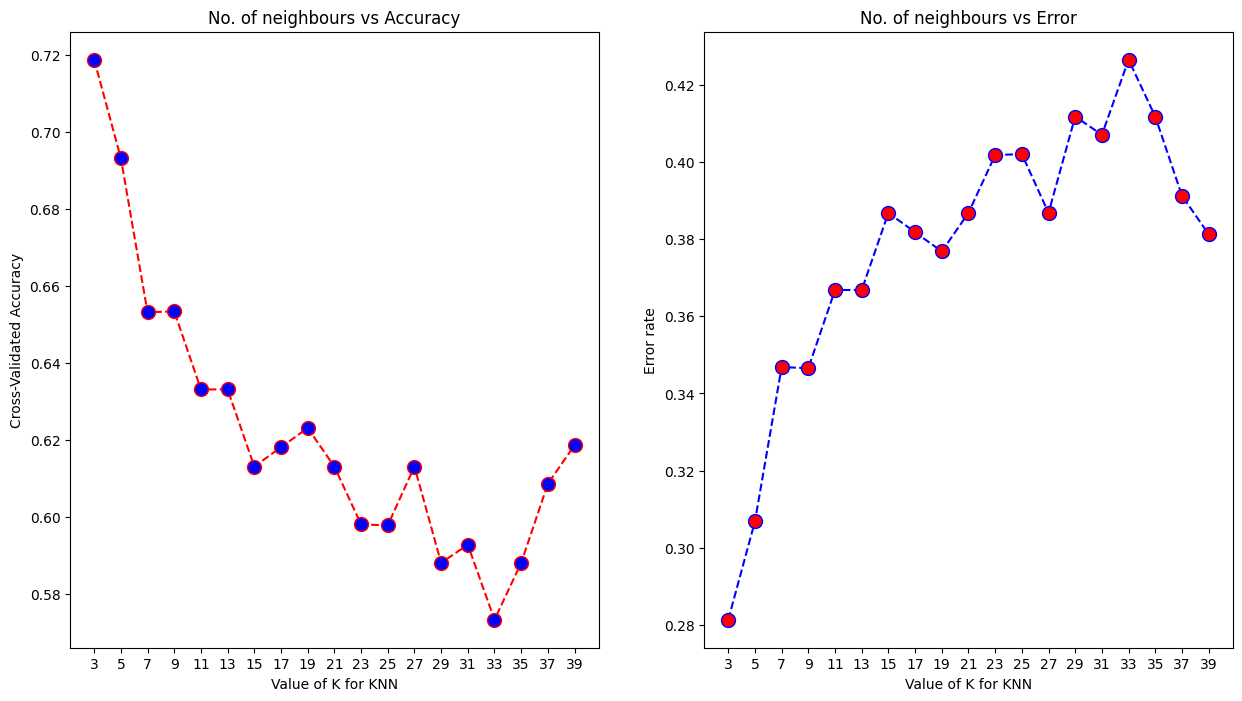

In [ ]:
k_range=np.array(range(3,40,2))
k_scores=[]
errors_rate=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=10)
  k_scores.append(scores.mean())
    
  errors_rate.append((1-scores.mean()))


plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , errors_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) 
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show()      